In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
images = [file for file in glob.glob('/content/drive/MyDrive/test1/problem1_op/input_images*.png')]

In [ ]:
images

['/content/drive/MyDrive/datasets/defect_assignment/good.png',
 '/content/drive/MyDrive/datasets/defect_assignment/defect4.png',
 '/content/drive/MyDrive/datasets/defect_assignment/defect3.png',
 '/content/drive/MyDrive/datasets/defect_assignment/defect2.png',
 '/content/drive/MyDrive/datasets/defect_assignment/defect1.png']

In [ ]:
good_image=cv2.imread(images[0],cv2.IMREAD_GRAYSCALE)
defect1_image=cv2.imread(images[4],cv2.IMREAD_GRAYSCALE)
defect2_image=cv2.imread(images[3],cv2.IMREAD_GRAYSCALE)
defect3_image=cv2.imread(images[2],cv2.IMREAD_GRAYSCALE)
defect4_image=cv2.imread(images[1],cv2.IMREAD_GRAYSCALE)

In [ ]:
good_image=cv2.imread(images[0])
defect1_image=cv2.imread(images[4])
defect2_image=cv2.imread(images[3])
defect3_image=cv2.imread(images[2])
defect4_image=cv2.imread(images[1])

In [ ]:
arr=[good_image,defect1_image,defect2_image,defect3_image,defect4_image]

In [ ]:
plt.imshow(good_image)
plt.show()
plt.imshow(defect1_image)
plt.show()

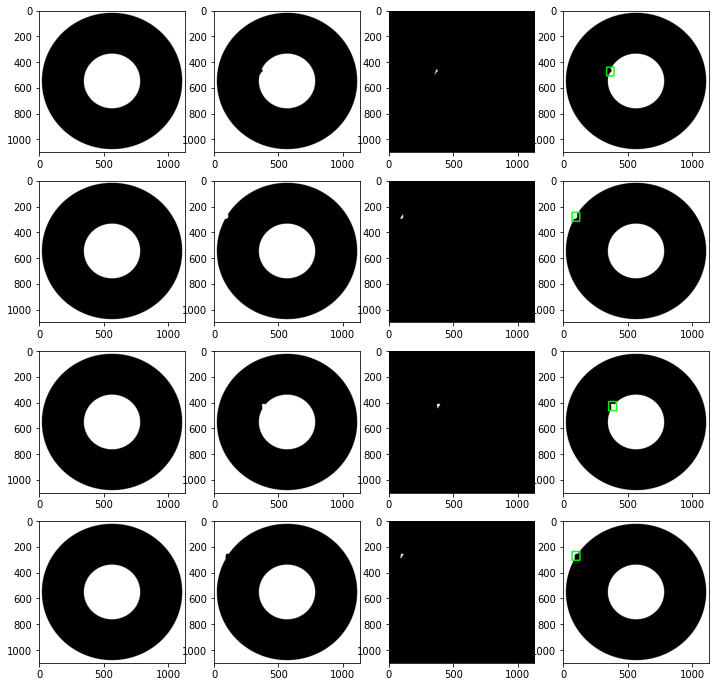

In [ ]:
fig=plt.figure(figsize=(12,12))
row=1
col=1
j=0
for i in range(1,len(arr)):
  new_img=arr[i].copy()
  bitwise=cv2.bitwise_xor(arr[0],arr[i])
  bitwise_new=cv2.cvtColor(bitwise,cv2.COLOR_BGR2GRAY)
  kernel=np.ones((5,5),np.uint8)
  bitwise_new=cv2.erode(bitwise_new,kernel,3)
  contours,heirarchy=cv2.findContours(bitwise_new,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  #print(len(contours))
  if(len(contours)):
    for contour in contours:
      x,y,w,h=cv2.boundingRect(contour)
      cv2.rectangle(new_img,(x-20,y-20),(x+w+20,y+h+20),(0,255,0),10)
  fig.add_subplot(4,4,j+1)
  plt.imshow(arr[0])
  fig.add_subplot(4,4,j+2)
  plt.imshow(arr[i])
  fig.add_subplot(4,4,j+3)
  plt.imshow(bitwise)
  fig.add_subplot(4,4,j+4)
  plt.imshow(new_img)
  j+=4

plt.show()


In [ ]:
#bitwise=cv2.subtract(arr[0],arr[i])
#(score, diff) = compare_ssim(arr[0], arr[i],multichannel=True)
#diff = (diff * 255).astype("uint8")
#bitwise_new=bitwise.copy()

In [ ]:
fig=plt.figure(figsize=(12,12))
row=1
col=1
j=0
path="/content/drive/MyDrive/test1/problem1_op/"
for i in range(1,len(arr)):
  new_img=arr[i].copy()
  bitwise=cv2.bitwise_xor(arr[0],arr[i])
  bitwise_new=cv2.cvtColor(bitwise,cv2.COLOR_BGR2GRAY)
  kernel=np.ones((5,5),np.uint8)
  bitwise_new=cv2.erode(bitwise_new,kernel,3)
  contours,heirarchy=cv2.findContours(bitwise_new,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  #print(len(contours))
  if(len(contours)):
    for contour in contours:
      x,y,w,h=cv2.boundingRect(contour)
      cv2.rectangle(new_img,(x-20,y-20),(x+w+20,y+h+20),(0,255,0),10)
  final_path=os.path.join(path,str(i)+".jpg")
  print(final_path)
  cv2.imwrite(final_path,new_img)
  plt.imshow(new_img)
  plt.show()